<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/dmi_fifa_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA 21 Player Dataset

**Data Source:** This dataset comes from [Kaggle's FIFA 21 complete player dataset](https://www.kaggle.com/datasets/stefanoleone992/fifa-21-complete-player-dataset/data).


The dataset contains 100+ attributes like player positions, with the role in the club and in the national team, player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc., and player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc..


In [1]:
import pandas as pd
import numpy as np
import time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import folium
from folium.plugins import MarkerCluster

from geopy.geocoders import Nominatim

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    file_path = '/content/drive/My Drive/Colab Notebooks/data-mining/data/players_21.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './data/players_21.csv'  # Local path

Mounted at /content/drive


In [3]:
df = pd.read_csv(file_path)
print("Dataset shape:", df.shape)

Dataset shape: (18944, 106)


In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [6]:
# from sklearn.model_selection import GridSearchCV

# features = ['age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
# df = df.dropna(subset=features + ['player_positions'])  # Clean missing values

# X = df[features]
# y = df['player_positions'].apply(lambda x: x.split(",")[0])  # Primary position only

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the model
# clf = DecisionTreeClassifier(random_state=42)

# # Define parameter grid
# param_grid = {
#     'max_depth': range(5, 20),
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 5, 10],
#     'criterion': ['gini', 'entropy']
# }

# # Grid Search
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Best accuracy:", grid_search.best_score_)

# Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 2}
# Best accuracy: 0.5461150447756107

In [7]:


# Select features and target
features = ['age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
df = df.dropna(subset=features + ['player_positions'])  # Clean missing values

X = df[features]
y = df['player_positions'].apply(lambda x: x.split(",")[0])  # Primary position only

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
# clf = DecisionTreeClassifier(max_depth=4, random_state=42) # 0.4533
# clf = DecisionTreeClassifier(max_depth=5, random_state=42) # 0.4909
# clf = DecisionTreeClassifier(max_depth=6, random_state=42) # 0.5161
# clf = DecisionTreeClassifier(max_depth=7, random_state=42) # 0.5375
# clf = DecisionTreeClassifier(max_depth=11, random_state=42) # 0.5383
# clf = DecisionTreeClassifier(max_depth=15, random_state=42) # 0.4951

# 0.5517
clf = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=10, min_samples_split=2, random_state=42) # 0.4951

clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))


Accuracy: 0.5517343611028758
Classification Report:               precision    recall  f1-score   support

         CAM       0.36      0.46      0.40       211
          CB       0.83      0.86      0.85       658
         CDM       0.43      0.43      0.43       305
          CF       0.00      0.00      0.00        24
          CM       0.54      0.66      0.60       464
          LB       0.33      0.31      0.32       270
          LM       0.28      0.21      0.24       229
          LW       0.00      0.00      0.00        86
         LWB       0.00      0.00      0.00        19
          RB       0.35      0.40      0.37       257
          RM       0.32      0.30      0.31       220
          RW       0.30      0.10      0.15        87
         RWB       0.00      0.00      0.00        23
          ST       0.77      0.87      0.82       520

    accuracy                           0.55      3373
   macro avg       0.32      0.33      0.32      3373
weighted avg       0.52     

Dataset shape: (18944, 106)


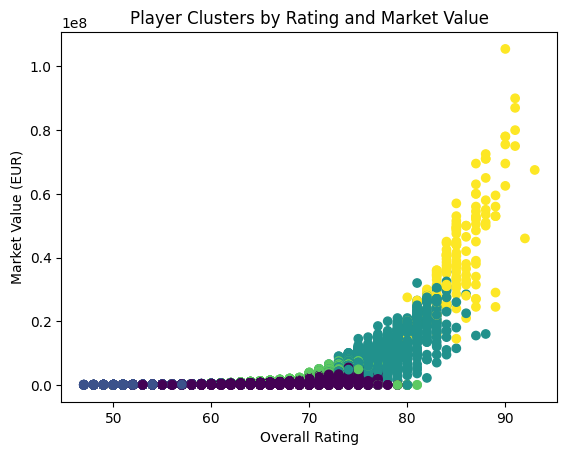

In [8]:
df = pd.read_csv(file_path)
print("Dataset shape:", df.shape)

# Select numeric features for clustering
features = ['age', 'overall', 'potential', 'value_eur', 'wage_eur']
df = df.dropna(subset=features)

X = df[features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(df['overall'], df['value_eur'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Overall Rating')
plt.ylabel('Market Value (EUR)')
plt.title('Player Clusters by Rating and Market Value')
plt.show()


In [9]:
pollutant_cols = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

df[pollutant_cols] = df[pollutant_cols].fillna(0)

df[pollutant_cols].describe()

KeyError: "None of [Index(['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'], dtype='object')] are in the [columns]"

In [ ]:
# Standardise the pollutant columns
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[pollutant_cols] = scaler.fit_transform(df_scaled[pollutant_cols])
print("Scaled pollutant values (first 5 rows):")
df_scaled[pollutant_cols].head()

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans_temp = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_temp.fit(df_scaled[pollutant_cols])
    wcss.append(kmeans_temp.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[pollutant_cols])
print("Cluster distribution:")
df_scaled['Cluster'].value_counts()

In [ ]:
cluster_summary = df_scaled.groupby('Cluster')[pollutant_cols].mean()
print("Cluster Summary:")
print(cluster_summary)

In [ ]:
geolocator = Nominatim(user_agent="air_pollution_clustering")

def get_lat_lon(city, country):
    try:
        location = geolocator.geocode(f"{city}, {country}", timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return np.nan, np.nan
    except Exception as e:
        return np.nan, np.nan

if 'Latitude' not in df.columns or 'Longitude' not in df.columns:
    latitudes = []
    longitudes = []
    for idx, row in df.iterrows():
        lat, lon = get_lat_lon(row['City'], row['Country'])
        latitudes.append(lat)
        longitudes.append(lon)
        time.sleep(1)
    df['Latitude'] = latitudes
    df['Longitude'] = longitudes

df = df.dropna(subset=['Latitude', 'Longitude'])
print("After geocoding, dataset shape:", df.shape)

In [ ]:
# Create an interactive world map centred on [20, 0]
world_map = folium.Map(location=[20, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(world_map)

# Define colours for clusters (adjust if optimal_k > len(colors))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred']

# Add markers for each city based on its cluster assignment
for idx, row in df_scaled.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']}, {row['Country']}<br>Cluster: {row['Cluster']}<br>CO: {row['CO AQI Value']:.2f}",
        icon=folium.Icon(color=colors[row['Cluster'] % len(colors)])
    ).add_to(marker_cluster)

# Save the map as an HTML file
world_map.save("air_pollution_clusters_map.html")
print("Map has been saved as 'air_pollution_clusters_map.html'.")
